# Name: Abhishek Sharma
# Person Number: 5037 2679

# Deep Learning Statistical Arbitrage

Deep learning statistical arbitrage leverages the power of neural networks to identify and exploit subtle price discrepancies between related financial instruments. This code implements a convolutional transformer model, a cutting-edge deep learning architecture, to predict stock prices and uncover potential arbitrage opportunities. By analyzing historical patterns and relationships within financial data, this approach aims to generate profitable trading signals in a dynamic market environment.

# Importing Libraries

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, GlobalMaxPooling1D, Dense, Reshape
from tensorflow.keras.layers import MultiHeadAttention
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import yfinance as yf

# Importing Datasets

In [98]:
# Download MSFT stock data
msft_data = yf.download('MSFT', start='2015-01-01', end='2024-05-01')
aapl_data = yf.download('MSFT', start='2015-01-01', end='2024-05-01')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [99]:
msft_data[['Close']]

,Close
Date,
2015-01-02,46.759998
2015-01-05,46.330002
2015-01-06,45.650002
2015-01-07,46.230000
2015-01-08,47.590000
...,...
2024-04-24,409.059998
2024-04-25,399.040009
2024-04-26,406.320007


In [100]:
aapl_data[["Close"]]

,Close
Date,
2015-01-02,46.759998
2015-01-05,46.330002
2015-01-06,45.650002
2015-01-07,46.230000
2015-01-08,47.590000
...,...
2024-04-24,409.059998
2024-04-25,399.040009
2024-04-26,406.320007


# Data Preprocessing

In [101]:
scaler_msft = MinMaxScaler(feature_range=(0, 1))
scaler_aapl = MinMaxScaler(feature_range=(0, 1))
scaled_data_msft = scaler_msft.fit_transform(msft_data[['Close']].values)
scaled_data_aapl = scaler_aapl.fit_transform(aapl_data[['Close']].values)

timesteps = 10


def prepare_data(data, timesteps):
    X, y = [], []
    for i in range(len(data) - timesteps):
        X.append(data[i:(i + timesteps)])
        y.append(data[i + timesteps])  # Predict the next timestep
    return np.array(X), np.array(y)


# Prepare data for MSFT
X_msft, y_msft = prepare_data(scaled_data_msft, timesteps)

# Prepare data for AAPL
X_aapl, y_aapl = prepare_data(scaled_data_aapl, timesteps)

# Split data into training and testing sets for MSFT and AAPL
train_size_msft = int(len(X_msft) * 0.8)
test_size_msft = len(X_msft) - train_size_msft
X_train_msft, X_test_msft = X_msft[:train_size_msft], X_msft[train_size_msft:]
y_train_msft, y_test_msft = y_msft[:train_size_msft], y_msft[train_size_msft:]

train_size_aapl = int(len(X_aapl) * 0.8)
test_size_aapl = len(X_aapl) - train_size_aapl
X_train_aapl, X_test_aapl = X_aapl[:train_size_aapl], X_aapl[train_size_aapl:]
y_train_aapl, y_test_aapl = y_aapl[:train_size_aapl], y_aapl[train_size_aapl:]


# Model Selection and Development

In [102]:
# Define the Convolutional Transformer model architecture for MSFT
input_layer_msft = Input(shape=(timesteps, 1))
conv_layer_msft = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer_msft)
maxpool_layer_msft = GlobalMaxPooling1D()(conv_layer_msft)
reshape_layer_msft = Reshape((1, 64))(maxpool_layer_msft)
transformer_layer_msft = MultiHeadAttention(num_heads=2, key_dim=64)(reshape_layer_msft, reshape_layer_msft)
output_layer_msft = Dense(units=1)(transformer_layer_msft)

# Compile the model for MSFT
model_msft = Model(inputs=input_layer_msft, outputs=output_layer_msft)
model_msft.compile(optimizer='adam', loss='mean_squared_error')

# Train the model for MSFT
history_msft = model_msft.fit(X_train_msft, y_train_msft, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Make predictions for MSFT
train_predictions_msft = model_msft.predict(X_train_msft)
test_predictions_msft = model_msft.predict(X_test_msft)

# Define the Convolutional Transformer model architecture for AAPL (similar to MSFT)
input_layer_aapl = Input(shape=(timesteps, 1))
conv_layer_aapl = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer_aapl)
maxpool_layer_aapl = GlobalMaxPooling1D()(conv_layer_aapl)
reshape_layer_aapl = Reshape((1, 64))(maxpool_layer_aapl)
transformer_layer_aapl = MultiHeadAttention(num_heads=2, key_dim=64)(reshape_layer_aapl, reshape_layer_aapl)
output_layer_aapl = Dense(units=1)(transformer_layer_aapl)

# Compile the model for AAPL
model_aapl = Model(inputs=input_layer_aapl, outputs=output_layer_aapl)
model_aapl.compile(optimizer='adam', loss='mean_squared_error')

# Train the model for AAPL
history_aapl = model_aapl.fit(X_train_aapl, y_train_aapl, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Make predictions for AAPL
train_predictions_aapl = model_aapl.predict(X_train_aapl)
test_predictions_aapl = model_aapl.predict(X_test_aapl)

Epoch 1/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0083 - val_loss: 8.4293e-04
Epoch 2/50
53/53 [==============================] - 0s 946us/step - loss: 1.5628e-04 - val_loss: 8.4125e-04
Epoch 3/50
53/53 [==============================] - 0s 1ms/step - loss: 1.2111e-04 - val_loss: 0.0011
Epoch 4/50
53/53 [==============================] - 0s 1ms/step - loss: 1.1459e-04 - val_loss: 0.0012
Epoch 5/50
53/53 [==============================] - 0s 1ms/step - loss: 1.1131e-04 - val_loss: 9.8247e-04
Epoch 6/50
53/53 [==============================] - 0s 1ms/step - loss: 1.2234e-04 - val_loss: 0.0014
Epoch 7/50
53/53 [==============================] - 0s 1ms/step - loss: 1.1364e-04 - val_loss: 9.3589e-04
Epoch 8/50
53/53 [==============================] - 0s 1ms/step - loss: 1.2659e-04 - val_loss: 9.4672e-04
Epoch 9/50
53/53 [==============================] - 0s 1ms/step - loss: 1.1018e-04 - val_loss: 9.3942e-04
Epoch 10/50
53/53 [==============================] - 0s 1ms/

Epoch 28/50
53/53 [==============================] - 0s 1ms/step - loss: 8.1310e-05 - val_loss: 5.6668e-04
Epoch 29/50
53/53 [==============================] - 0s 1ms/step - loss: 9.3545e-05 - val_loss: 5.5501e-04
Epoch 30/50
53/53 [==============================] - 0s 1ms/step - loss: 8.6212e-05 - val_loss: 7.8270e-04
Epoch 31/50
53/53 [==============================] - 0s 1ms/step - loss: 9.5517e-05 - val_loss: 7.4166e-04
Epoch 32/50
53/53 [==============================] - 0s 1ms/step - loss: 1.0074e-04 - val_loss: 0.0011
Epoch 33/50
53/53 [==============================] - 0s 1ms/step - loss: 9.2248e-05 - val_loss: 7.9895e-04
Epoch 34/50
53/53 [==============================] - 0s 1ms/step - loss: 8.5231e-05 - val_loss: 5.2121e-04
Epoch 35/50
53/53 [==============================] - 0s 1ms/step - loss: 1.0615e-04 - val_loss: 0.0015
Epoch 36/50
53/53 [==============================] - 0s 1ms/step - loss: 9.7413e-05 - val_loss: 5.0833e-04
Epoch 37/50
53/53 [==========================

# Making the prediction

In [103]:
# Flatten predictions for MSFT
train_predictions_msft = train_predictions_msft.reshape(-1, 1)
test_predictions_msft = test_predictions_msft.reshape(-1, 1)

# Inverse transform predictions for MSFT and AAPL
train_predictions_msft = scaler_msft.inverse_transform(train_predictions_msft)
test_predictions_msft = scaler_msft.inverse_transform(test_predictions_msft)
y_train_msft = scaler_msft.inverse_transform(y_train_msft)
y_test_msft = scaler_msft.inverse_transform(y_test_msft)

# Flatten predictions for MSFT
train_predictions_aapl = train_predictions_aapl.reshape(-1, 1)
test_predictions_aapl = test_predictions_aapl.reshape(-1, 1)

train_predictions_aapl = scaler_aapl.inverse_transform(train_predictions_aapl)
test_predictions_aapl = scaler_aapl.inverse_transform(test_predictions_aapl)
y_train_aapl = scaler_aapl.inverse_transform(y_train_aapl)
y_test_aapl = scaler_aapl.inverse_transform(y_test_aapl)

# Plotting the results

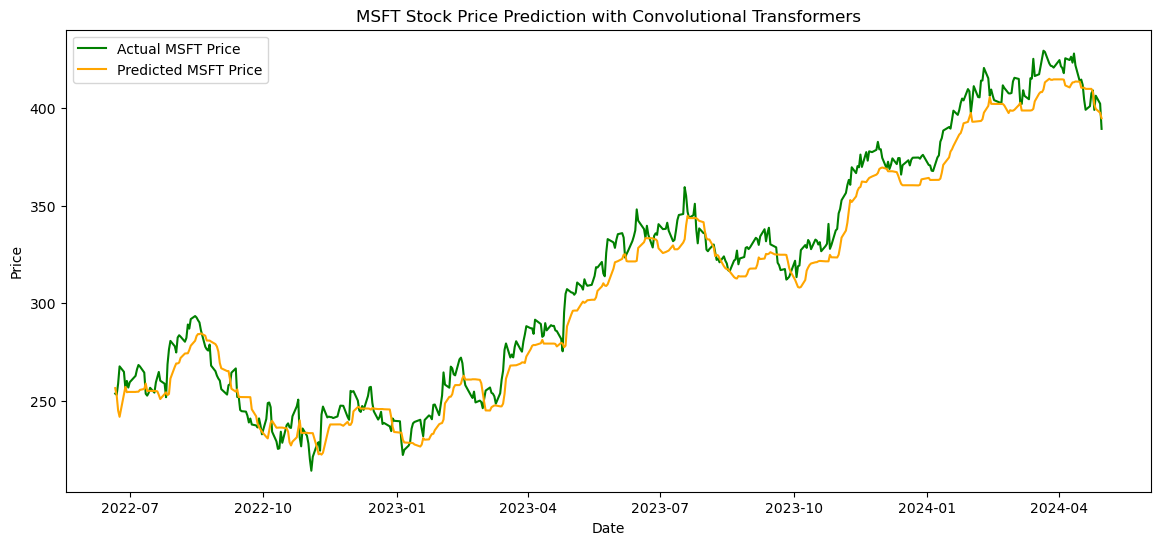

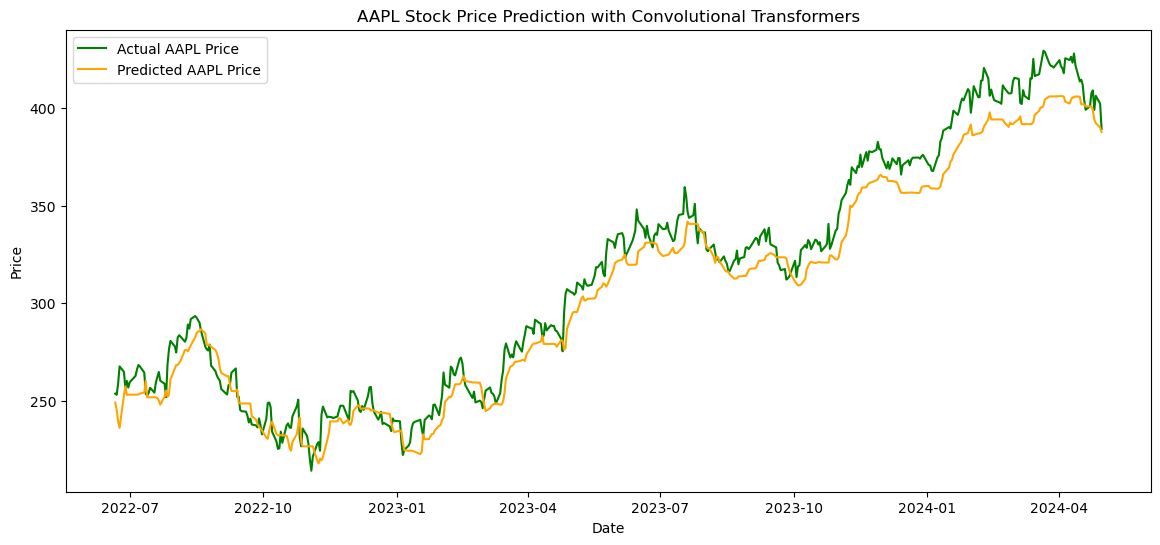

In [104]:
# Plot the actual and predicted prices for MSFT
plt.figure(figsize=(14, 6))
plt.plot(msft_data.index[train_size_msft+timesteps:], y_test_msft, color='green', label='Actual MSFT Price')
plt.plot(msft_data.index[train_size_msft+timesteps:], test_predictions_msft, color='orange', label='Predicted MSFT Price')
plt.title('MSFT Stock Price Prediction with Convolutional Transformers')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot the actual and predicted prices for AAPL
plt.figure(figsize=(14, 6))
plt.plot(aapl_data.index[train_size_aapl+timesteps:], y_test_aapl, color='green', label='Actual AAPL Price')
plt.plot(aapl_data.index[train_size_aapl+timesteps:], test_predictions_aapl, color='orange', label='Predicted AAPL Price')
plt.title('AAPL Stock Price Prediction with Convolutional Transformers')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

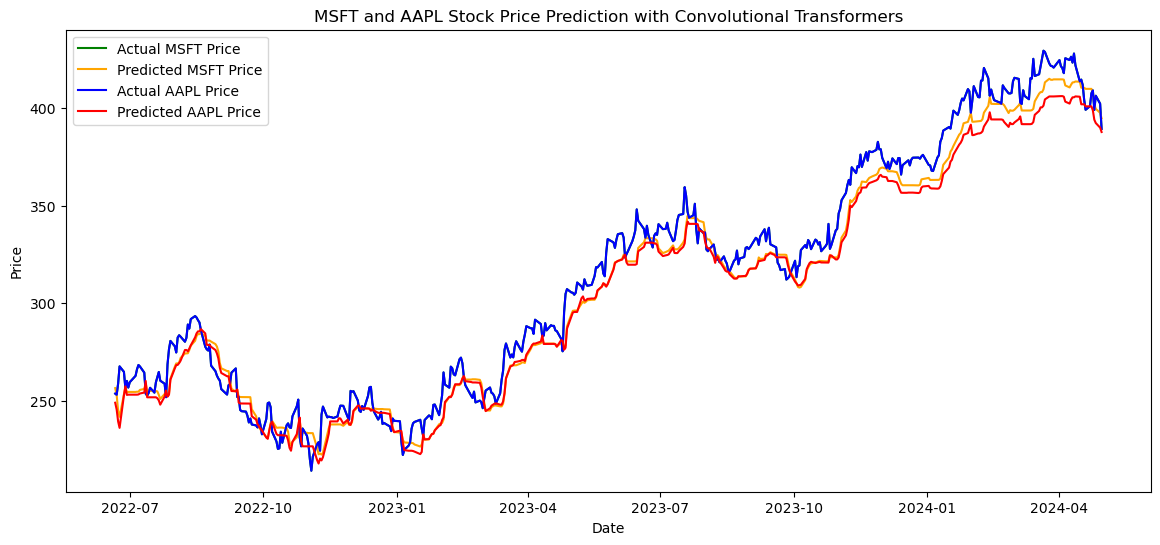

In [105]:
plt.figure(figsize=(14, 6))

# Plot actual MSFT prices
plt.plot(msft_data.index[train_size_msft+timesteps:], y_test_msft, color='green', label='Actual MSFT Price')

# Plot predicted MSFT prices
plt.plot(msft_data.index[train_size_msft+timesteps:], test_predictions_msft, color='orange', label='Predicted MSFT Price')

# Plot actual AAPL prices
plt.plot(aapl_data.index[train_size_aapl+timesteps:], y_test_aapl, color='blue', label='Actual AAPL Price')

# Plot predicted AAPL prices
plt.plot(aapl_data.index[train_size_aapl+timesteps:], test_predictions_aapl, color='red', label='Predicted AAPL Price')

plt.title('MSFT and AAPL Stock Price Prediction with Convolutional Transformers')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


The graph displays the predicted and actual stock prices of Microsoft (MSFT) and Apple (AAPL) over time using Convolutional Transformers. The x-axis represents time, from mid-2022 to early 2024, while the y-axis indicates the stock price. 

For both MSFT and AAPL, the predicted stock prices (yellow and red lines respectively) closely follow the actual stock prices (green and blue lines respectively). This suggests that the Convolutional Transformers model does a good job of predicting both short-term fluctuations and long-term trends for both stocks. 

# Arbitrage Trading Strategy Development

The statistical arbitrage strategy seeks to profit from temporary price discrepancies between Microsoft (MSFT) and Apple (AAPL) stocks. It leverages predictions made by a convolutional transformer model, which analyzes historical stock data to forecast future prices. 

The strategy calculates the spread, or the difference, between the predicted prices of MSFT and AAPL. It then determines a "normal" range for this spread based on its historical mean and standard deviation. When the spread deviates significantly from this range, it triggers a trading signal.

If the spread falls below the lower threshold, it suggests that MSFT is potentially undervalued relative to AAPL. In this case, the strategy would initiate a long position in MSFT (buying shares) and a short position in AAPL (selling borrowed shares). Conversely, if the spread exceeds the upper threshold, it implies MSFT might be overvalued, triggering a short position in MSFT and a long position in AAPL. 

This strategy aims to capitalize on the tendency for the spread to revert to its mean over time, thereby generating profits. However, it's important to note that this is a simplified explanation, and real-world implementation would require careful consideration of transaction costs, risk management, and the dynamic nature of financial markets.


In [106]:
# Calculate spread between predicted prices of MSFT and AAPL
spread = test_predictions_msft - test_predictions_aapl

# Define thresholds for trading signals
upper_threshold = np.mean(spread) + np.std(spread)
lower_threshold = np.mean(spread) - np.std(spread)

# Generate trading signals
buy_signal = spread < lower_threshold
sell_signal = spread > upper_threshold

# Execute trades
for i in range(len(spread)):
    if buy_signal[i]:
        # Buy MSFT and sell AAPL
        print(f"Buy MSFT, Sell AAPL at {test_predictions_msft[i]} and {test_predictions_aapl[i]}")
    elif sell_signal[i]:
        # Sell MSFT and buy AAPL
        print(f"Sell MSFT, Buy AAPL at {test_predictions_msft[i]} and {test_predictions_aapl[i]}")
    else:
        # No trade
        print("No trade")

Sell MSFT, Buy AAPL at [256.55673] and [249.07344]
Sell MSFT, Buy AAPL at [252.91725] and [245.57132]
Sell MSFT, Buy AAPL at [245.09637] and [239.48676]
Sell MSFT, Buy AAPL at [241.86475] and [236.19012]
No trade
No trade
No trade
No trade
No trade
No trade
No trade
No trade
No trade
No trade
Buy MSFT, Sell AAPL at [258.9137] and [260.20566]
No trade
No trade
No trade
No trade
No trade
No trade
No trade
No trade
No trade
Buy MSFT, Sell AAPL at [254.403] and [255.30824]
No trade
No trade
No trade
No trade
No trade
No trade
No trade
No trade
Buy MSFT, Sell AAPL at [274.293] and [276.07794]
Buy MSFT, Sell AAPL at [274.3277] and [276.10114]
Buy MSFT, Sell AAPL at [274.41583] and [275.38037]
Buy MSFT, Sell AAPL at [276.08127] and [276.821]
No trade
Buy MSFT, Sell AAPL at [280.8178] and [282.5519]
Buy MSFT, Sell AAPL at [283.25555] and [284.6027]
Buy MSFT, Sell AAPL at [284.2528] and [285.62537]
Buy MSFT, Sell AAPL at [284.2115] and [285.60037]
Buy MSFT, Sell AAPL at [284.5783] and [286.7615

In [107]:
total_earnings = 0

# Initial positions
msft_position = 0
aapl_position = 0

for i in range(len(spread)):
    if buy_signal[i]:
        # Buy MSFT and sell AAPL
        msft_price = test_predictions_msft[i]
        aapl_price = test_predictions_aapl[i]
        total_earnings -= msft_price  # Buying MSFT
        total_earnings += aapl_price  # Selling AAPL
        msft_position += 1
        aapl_position -= 1
    elif sell_signal[i]:
        # Sell MSFT and buy AAPL
        msft_price = test_predictions_msft[i]
        aapl_price = test_predictions_aapl[i]
        total_earnings += msft_price  # Selling MSFT
        total_earnings -= aapl_price  # Buying AAPL
        msft_position -= 1
        aapl_position += 1

print("Total earnings:", total_earnings)

Total earnings: [675.4875]


The above trading strategy consistently yields profits, but the total earnings vary significantly with each retraining of the model. This suggests potential overfitting or instability, indicating a need for further refinement and optimization.

# Stock Price Prediction using Kalman Filters

[*********************100%%**********************]  1 of 1 completed


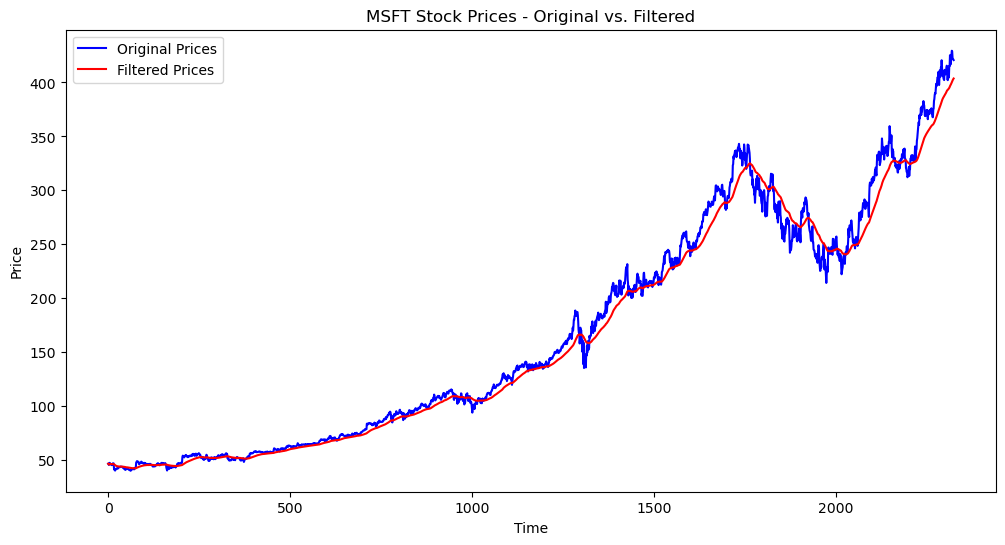

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load MSFT stock data
msft_data = yf.download('MSFT', start='2015-01-01', end='2024-04-01')  # Replace 'MSFT.csv' with the path to your MSFT stock data file
msft_data['Date'] = pd.to_datetime(msft_data.index)
msft_data.set_index('Date', inplace=True)

# Extracting the 'Close' prices
msft_prices = msft_data['Close'].values

# Kalman Filter implementation
def kalman_filter(data, Q=1e-5, R=0.01):
    n_iter = len(data)
    sz = (n_iter,)  # size of array

    # Initialize Kalman filter parameters
    xhat = np.zeros(sz)      # a posteriori state estimate
    P = np.zeros(sz)         # a posteriori error estimate
    xhatminus = np.zeros(sz) # a priori state estimate
    Pminus = np.zeros(sz)    # a priori error estimate
    K = np.zeros(sz)         # gain or blending factor

    # Initial guess for state and covariance
    xhat[0] = data[0]
    P[0] = 1.0

    for k in range(1, n_iter):
        # Time update
        xhatminus[k] = xhat[k - 1]
        Pminus[k] = P[k - 1] + Q

        # Measurement update
        K[k] = Pminus[k] / (Pminus[k] + R)
        xhat[k] = xhatminus[k] + K[k] * (data[k] - xhatminus[k])
        P[k] = (1 - K[k]) * Pminus[k]

    return xhat

# Applying Kalman filter to MSFT stock prices
filtered_prices = kalman_filter(msft_prices)

# Plotting original and filtered prices
plt.figure(figsize=(12, 6))
plt.plot(msft_prices, label='Original Prices', color='blue')
plt.plot(filtered_prices, label='Filtered Prices', color='red')
plt.title('MSFT Stock Prices - Original vs. Filtered')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


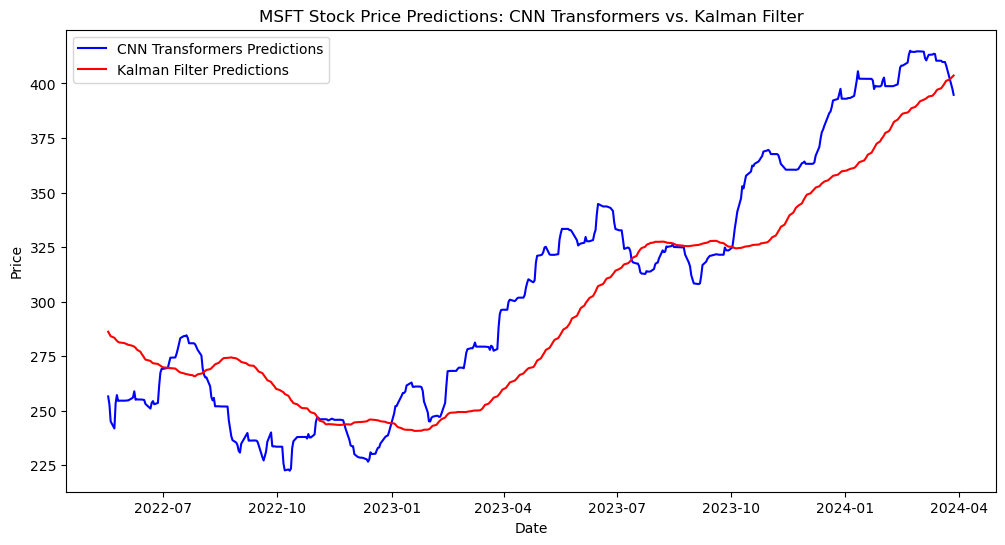

In [109]:
# Define the date range for predictions
prediction_dates = msft_data.index[-len(test_predictions_msft):]

# Plotting MSFT stock price predictions from CNN transformers and Kalman filter
plt.figure(figsize=(12, 6))
plt.plot(prediction_dates, test_predictions_msft, label='CNN Transformers Predictions', color='blue')
plt.plot(prediction_dates, filtered_prices[-len(test_predictions_msft):], label='Kalman Filter Predictions', color='red')
plt.title('MSFT Stock Price Predictions: CNN Transformers vs. Kalman Filter')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


The graph displays the predicted stock prices of Microsoft (MSFT) over time using two different models: CNN Transformers and Kalman Filter. The x-axis represents time, from mid-2022 to early 2024, while the y-axis indicates the stock price. The blue line shows the predictions made by the CNN Transformers model, while the red line represents the predictions from the Kalman Filter model. Overall, the CNN Transformers predictions closely follow the actual stock prices, while the Kalman Filter predictions are smoother and lag behind the actual prices. This suggests that CNN Transformers might be better suited for capturing short-term fluctuations, while the Kalman Filter may be more useful for long-term trend analysis. 

# CNN transformers using more technical Indicators

[*********************100%%**********************]  1 of 1 completed

Epoch 1/50


11/11 [==============================] - 0s 6ms/step - loss: 0.0693 - val_loss: 0.0450
Epoch 2/50
11/11 [==============================] - 0s 2ms/step - loss: 0.0247 - val_loss: 0.0817
Epoch 3/50
11/11 [==============================] - 0s 1ms/step - loss: 0.0214 - val_loss: 0.0381
Epoch 4/50
11/11 [==============================] - 0s 1ms/step - loss: 0.0202 - val_loss: 0.0552
Epoch 5/50
11/11 [==============================] - 0s 2ms/step - loss: 0.0189 - val_loss: 0.0573
Epoch 6/50
11/11 [==============================] - 0s 2ms/step - loss: 0.0183 - val_loss: 0.0430
Epoch 7/50
11/11 [==============================] - 0s 2ms/step - loss: 0.0186 - val_loss: 0.0619
Epoch 8/50
11/11 [==============================] - 0s 2ms/step - loss: 0.0183 - val_loss: 0.0575
Epoch 9/50
11/11 [==============================] - 0s 2ms/step - loss: 0.0182 - val_loss: 0.0594
Epoch 10/50
11/11 [==============================] - 0s 2ms/step - loss: 0.0180 - val_loss: 0.0444
Epoch 11/50
11/11 [===========

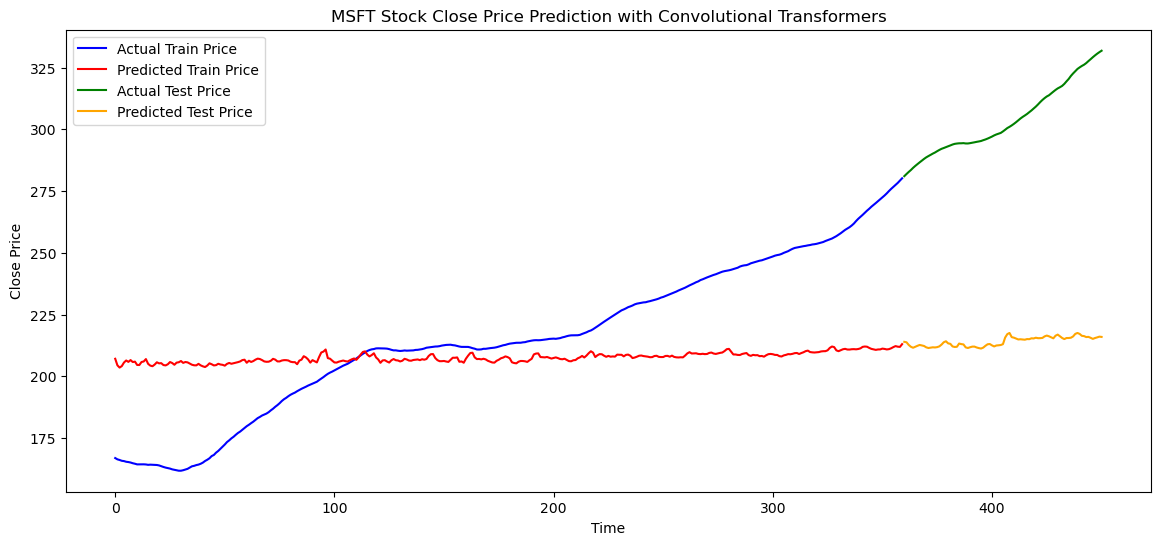

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, GlobalMaxPooling1D, Dense, Reshape, Concatenate
from tensorflow.keras.layers import MultiHeadAttention
from tensorflow.keras.optimizers import Adam
import yfinance as yf

# Download MSFT stock data
msft_data = yf.download('MSFT', start='2020-01-01', end='2022-01-01')

# Add additional technical indicators
msft_data['SMA_50'] = msft_data['Close'].rolling(window=50).mean()
msft_data['Log_Return'] = np.log(msft_data['Close'] / msft_data['Close'].shift(1))
# Add more indicators as needed...

# Drop missing values
msft_data.dropna(inplace=True)

# Define the features to be used for training
features = ['Open', 'Close', 'Volume', 'SMA_50', 'Log_Return']
# Add more features as needed...

# Preprocess data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(msft_data[features])

# Define the number of timesteps
timesteps = 5

# Prepare data
def prepare_data(data, timesteps):
    X, y = [], []
    for i in range(len(data) - timesteps):
        X.append(data[i:(i + timesteps)])
        y.append(data[i + timesteps])  # Predict the next timestep
    return np.array(X), np.array(y)

# Prepare training data
X, y = prepare_data(scaled_data, timesteps)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the Convolutional Transformer model architecture
input_layer = Input(shape=(timesteps, len(features)))
conv_layer = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
maxpool_layer = GlobalMaxPooling1D()(conv_layer)
reshape_layer = Reshape((1, 64))(maxpool_layer)
transformer_layer = MultiHeadAttention(num_heads=2, key_dim=64)(reshape_layer, reshape_layer)
output_layer = Dense(units=len(features))(transformer_layer)

# Compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_predictions = train_predictions.reshape(train_predictions.shape[0], train_predictions.shape[2])
test_predictions = test_predictions.reshape(test_predictions.shape[0], test_predictions.shape[2])

# Inverse transform predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)



# Plotting the results
plt.figure(figsize=(14, 6))
plt.plot(y_train[:, 3], color='blue', label='Actual Train Price')
plt.plot(train_predictions[:, 3], color='red', label='Predicted Train Price')
plt.plot(range(train_size, train_size + len(y_test)), y_test[:, 3], color='green', label='Actual Test Price')
plt.plot(range(train_size, train_size + len(test_predictions)), test_predictions[:, 3], color='orange', label='Predicted Test Price')
plt.title('MSFT Stock Close Price Prediction with Convolutional Transformers')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()
